In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import f_oneway



In [2]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,male,group D,associate's degree,free/reduced,completed,80.333333
1,female,group C,some college,standard,completed,75.666667
2,male,group C,some college,free/reduced,none,65.666667
3,female,group D,master's degree,free/reduced,completed,57.333333
4,female,group A,some college,standard,completed,77.666667


In [15]:
# List of categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

anova_results = {}

# Perform ANOVA for each categorical feature against the target variable
for feature in categorical_features:
    groups = [data[data[feature] == category]['average_score'] for category in data[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}

# Display ANOVA results and dynamically explain
for feature, result in anova_results.items():
    print(f"ANOVA results for {feature}:")
    print(f"F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")

    # Explain the significance of the p-value
    if result['p-value'] < 0.05:
        print(f"Explanation: The p-value is less than 0.05, which indicates a statistically significant difference in average scores across the different categories of {feature}. We reject the null hypothesis and conclude that {feature} does have an impact on the average scores.")
    else:
        print(f"Explanation: The p-value is greater than or equal to 0.05, which indicates no statistically significant difference in average scores across the different categories of {feature}. We fail to reject the null hypothesis and conclude that {feature} does not have a significant impact on average scores.")

    print('-' * 40)


ANOVA results for gender:
F-statistic: 11.069217770452797, p-value: 0.00092373654456529
Explanation: The p-value is less than 0.05, which indicates a statistically significant difference in average scores across the different categories of gender. We reject the null hypothesis and conclude that gender does have an impact on the average scores.
----------------------------------------
ANOVA results for race/ethnicity:
F-statistic: 6.264634925026166, p-value: 5.9081898379965125e-05
Explanation: The p-value is less than 0.05, which indicates a statistically significant difference in average scores across the different categories of race/ethnicity. We reject the null hypothesis and conclude that race/ethnicity does have an impact on the average scores.
----------------------------------------
ANOVA results for parental level of education:
F-statistic: 6.404608612629991, p-value: 7.903444184141747e-06
Explanation: The p-value is less than 0.05, which indicates a statistically significant di

In [12]:
#one hot encode cat data
data2 = pd.get_dummies(data)

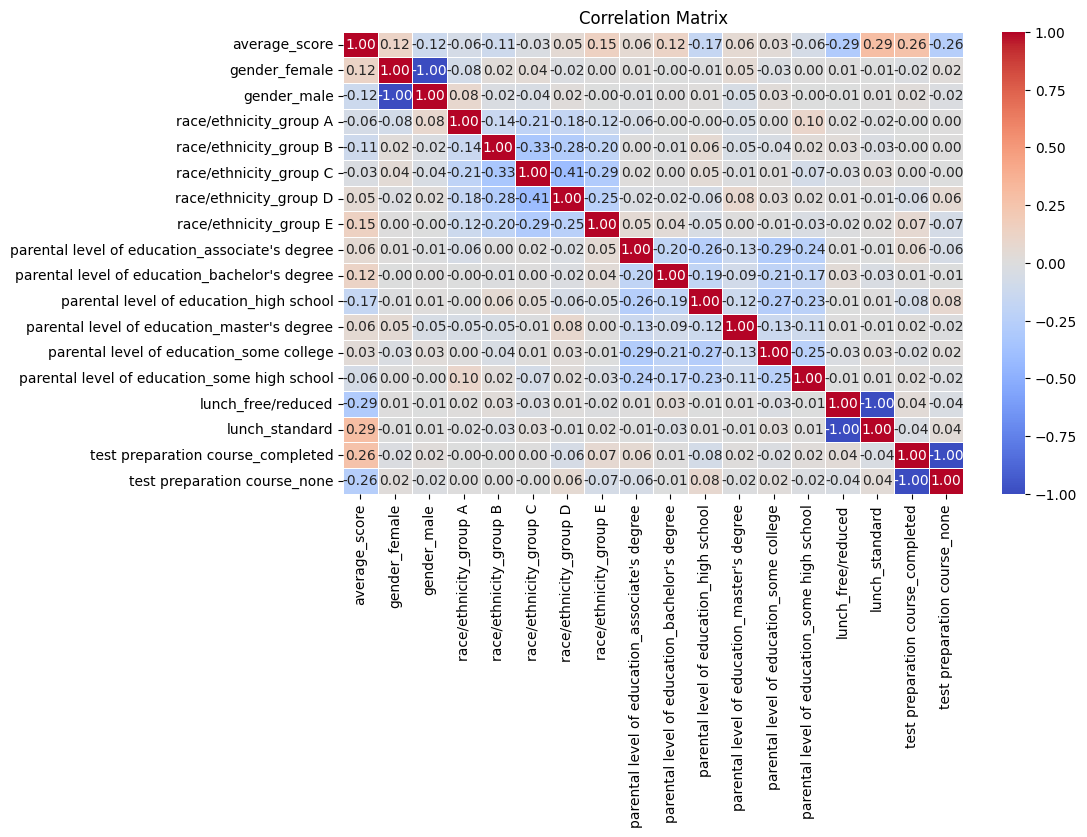

Correlation with Average Score:
average_score                                     1.000000
gender_female                                     0.124944
gender_male                                      -0.124944
race/ethnicity_group A                           -0.064658
race/ethnicity_group B                           -0.110105
race/ethnicity_group C                           -0.030854
race/ethnicity_group D                            0.051352
race/ethnicity_group E                            0.147382
parental level of education_associate's degree    0.059549
parental level of education_bachelor's degree     0.117500
parental level of education_high school          -0.165620
parental level of education_master's degree       0.057084
parental level of education_some college          0.032433
parental level of education_some high school     -0.064092
lunch_free/reduced                               -0.291518
lunch_standard                                    0.291518
test preparation course_

In [13]:
# Correlation matrix
correlation_matrix = data2.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Correlation with target variable
print("Correlation with Average Score:")
print(correlation_matrix['average_score'])

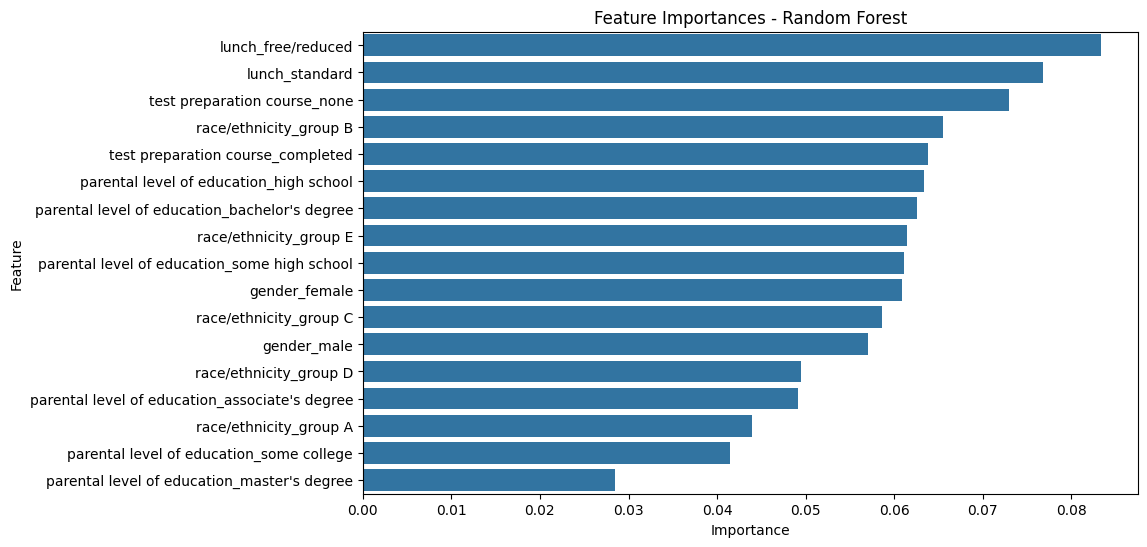

                                           Feature  Importance
13                              lunch_free/reduced    0.083331
14                                  lunch_standard    0.076783
16                    test preparation course_none    0.072990
3                           race/ethnicity_group B    0.065534
15               test preparation course_completed    0.063837
9          parental level of education_high school    0.063405
8    parental level of education_bachelor's degree    0.062536
6                           race/ethnicity_group E    0.061484
12    parental level of education_some high school    0.061100
0                                    gender_female    0.060823
4                           race/ethnicity_group C    0.058587
1                                      gender_male    0.057084
5                           race/ethnicity_group D    0.049445
7   parental level of education_associate's degree    0.049113
2                           race/ethnicity_group A    0

In [11]:

X = data.drop(columns=['average_score'])
y = data['average_score']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_encoded, y)

# Feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances - Random Forest")
plt.show()

# Print feature importances
print(feature_importance_df)